# Python vs. Microsoft Excel
Microsoft **Excel** is great for small jobs and good at large ones. But when we get huge, we turn to databases and "real" data analysis systems. Using $R$ or Python tools is a common destination when data gets **big**. There are many other options, but we will be sticking with the same tool for all our exercises: **Python**. The goal is not to teach programing, but to teach how these tools are **useful** and just enough Python code to use these notebooks that are already set up for you.

You can go deeper. Much deeper. In the depths, the true power awaits.

## Pandas
Excel has **rows and columns**. Columns often have headings. We could do all of this in simple Python with lists of lists and other clumsy data structures but, there is a tool that can make things simple, pandas. **Pandas** is a package that provides a data object called a "**dataframe**" and  tools for using this object. We will learn by doing and so will leave the details until later. First we must **load the package**. Use the code below to do so. 

In [1]:
import pandas as pd   #import the pandas tools and rename the whole set as "pd"

## Getting Data
We can get a data set two ways: we can **type it in** or we can **read** a data file. The first way is very Excel, isn't it. For small jobs we can just enter the data and then go mess with it. The second way is more practical. The data may already in a **digital format**: it might be written in your assignment and presented in PDF fpormat, it may be available as a **data file** (in various formats) on the course web site, it could have been **generated** by your lab instrument and saved on a thumb drive, or you might be **cutting and pasting** from the web.

We will consider two methods: **manual** data entry and **reading** a data set from a file.

### Manual Entry

Excel has **rows and columns**. Pandas **dataframes** contains the series (columns) and indexes (rows) of data. each series can have a name (and also, each index can be identified by a name if you wish). These dataframes can be **addressed** by series name (column header) or by index (row), just like Excel **spreadsheets**. I will be using the terms "columns" and "rows" as we go forward, to keep things simple.

Examine the code below. First we create the data. We created a **list** of data **pairs**. Each pair is a **row**. We then designated the **columns** with names. We can address the columns by name or by position (column 0 or 1).

In [2]:
data = [[1, 4], [2, 5], [3, 6]]   # Create a list of data row lists
df = pd.DataFrame(data)           # Convert the list of lists into a dataframe object
df.columns = ["cows","sheep"]     # Set the column headers to specific values
display(df)                       # Report the dataframe object

,cows,sheep
0,1,4
1,2,5
2,3,6


The data is presented in a dataframe. The columns have been **labeled** as "cows" and "sheep". The rows are **indexed** with 0,1,and 2 (but we can change that). Consider the following and try to understand what happened.

In [3]:
df = df.rename(columns={"cows": "dog"})   # Rename the "cows" column to "dog"
df.index = ['A','B','C']                  # Set the index values to a list of letters
df = df.rename(index={"A": "E"})          # Rename the "A" index to "E"
df                                        # Report the dataframe object

,dog,sheep
E,1,4
B,2,5
C,3,6


There are many tools that can **manipulate** the dataframe. Just as an Excel spreadsheet has functions that can operate on the data, **pandas** has methods and functions that can do the same. We will learn a few of these tools as we move forward. For more informations see the [documentation](https://pandas.pydata.org/docs/reference/frame.html).

### Another Example and Comparing Excel and Pandas Definitions
Observe how the function call that **creates** a dataframe can set the column names (and also the row names, if we choose to do so). In this example we will create a **dataframe** that parallels an Excel **spreadsheet**. (NaN is the Python placeholder for "Not a Number").

In [4]:
comparisons = [["Worksheet","Dataframe"],
               ["Column","Series"],
               ["Row","Index"],
               ["Empty cell","NaN"]]
df = pd.DataFrame(comparisons,  columns=["Excel", "pandas"]) 
df                                                           

,Excel,pandas
0,Worksheet,Dataframe
1,Column,Series
2,Row,Index
3,Empty cell,NaN


### Reading Data From a file
Rather than type the dataframe data into a list or list of lists (or a NumPy array) we can **import** a set of data from a file. The Pandas package has many tools for importing various **data formats**. We will import a "**comma separated value**" file, also know as a **csv** file. The file is available on the moodle site and the content of the data file is reproduced below.

```
Excel,pandas
Worksheet,Dataframe
Column,Series
Row,Index
Empty cell,NaN
```

`pandas.read_csv` will assume the **first line** is the names of the **data series** (columns)

In [5]:
df = pd.read_csv("E1_data.csv")              # pandas provides tools for reading files
df                                        # Report the dataframe object

,Excel,pandas
0,Worksheet,Dataframe
1,Column,Series
2,Row,Index
3,Empty cell,NaN


The data.csv file must be in the same directory as this notebook. If not then the **file path** must be specified.

## Operating on the Data
The dataframe object contains **columns and rows** of data. A typical dataframe will have columns of data that are identified by the column heading and rows identified by an index (usually a range of numbers from zero to n-1). Let us import a data file called `data2.csv` that contains data for concentration over time for a **first order reaction**.


In [6]:
df = pd.read_csv("E1_data2.csv", delimiter = "\t") # This data file uses tabs 
df                                                 # Report the dataframe object

,time,conc
0,25,48.32
1,60,42.45
2,90,37.99
3,120,34.00
4,300,17.47
5,600,5.76


In a first order reaction we can find the **rate constant**, $k$, by **plotting** the linear form of the equation. We need to plot the natural logarithm of the concentration of reactant vs. time. We can add a new column by a simple math **operation**. Consider the following...

In [7]:
import numpy                                 # import a giant set of math tools

df["ln_conc"] = numpy.log(df["conc"])        # numpy.log() is ln (log base e). 
df["1/time"] = 1/df["time"]                  # Make a new column for 1/time
df["1/time*time"] = df["time"]*df["1/time"]  # We can multiply series together. 
df                                           # Report the dataframe object

,time,conc,ln_conc,1/time,1/time*time
0,25,48.32,3.877846,0.040000,1.0
1,60,42.45,3.748327,0.016667,1.0
2,90,37.99,3.637323,0.011111,1.0
3,120,34.00,3.526361,0.008333,1.0
4,300,17.47,2.860485,0.003333,1.0
5,600,5.76,1.750937,0.001667,1.0


In [8]:
df = df.drop(columns=["1/time","1/time*time"])  # drop coluns we don't need 
df                                              # Report the dataframe object

,time,conc,ln_conc
0,25,48.32,3.877846
1,60,42.45,3.748327
2,90,37.99,3.637323
3,120,34.00,3.526361
4,300,17.47,2.860485
5,600,5.76,1.750937


## A Quick Intro to Plotting
The `matplotlib.pyplot` package contains the **tools** needed for making plots. Calling a plotting function creates an plot **object** that persists and can be added to and modified by other Matplotlib tools.  Finally it is **visualized** by calling the `plt.show()` function. This **displays** the plot and **clears** the plot object (try calling the function a second time and see what you get.)

The **plot style** parameter can be expressed as a short string of characters denoting **color** ('k' = black), **marker** ('o' = circle) and **line** ('-' = solid line).

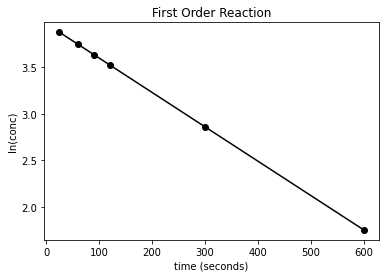

In [9]:
import matplotlib.pyplot as plt            # import plotting tools

plt.plot(df["time"],df["ln_conc"], "ko-")  # plot the data. 
plt.xlabel("time (seconds)")               # add/change the x- and y-axis labels 
plt.ylabel("ln(conc)")
plt.title("First Order Reaction")          # add/change the title of the plot 
plt.show()                                 # display and clear the plot 

## Linear Regression
For a first order reaction, we know that the **relationship** of observed concentration, $C_t$, and time, $t$, is dependant on the initial concentration, $C_0$, and the rate consant, $k$.

$$C_t=C_0\cdot e^{-kt}$$

And we can apply the natural log function to this equation to create the following **linear form**.

$$\ln(C_t)=ln(C_0)-k\cdot t$$

We now see that a plot of $\ln(C_t)$ vs. $t$ will have a **slope** of $-k$ and an **intercept** of $\ln (C_0$)

The **SciPy library** contains many tools for **scientific data analysis**. We will use a tool that performs a standard **linear regression** on $x,y$ data. Calling the `sciply.stats.linregress()` function will return an object that **contains** all the parameters of the linear regression fit. Consider the following.

In [10]:
import scipy.stats

fit = scipy.stats.linregress(df["time"],df["ln_conc"])  

# The linear regression result object, fit, contains slope in fit.slope
print("Slope =",fit.slope.round(4))          # all floating point values have a .round() method that can be applied
print("Intercept =",fit.intercept.round(2))  # Type dir(fit) to see all the variable, methods and functions 
print("R =", fit.rvalue.round(4))
print("slope STDEV =",fit.stderr.round(8))    
print("intercept STDEV =", fit.intercept_stderr.round(6))

Slope = -0.0037
Intercept = 3.97
R = -1.0
slope STDEV = 1.3e-07
intercept STDEV = 3.6e-05


## Summary
We can import or create a **dataframe** and we can apply math operations to the columns. We can **add** new columns, **replace** data in a column or **drop** (delete) columns. Then we can **visualize** a plot of any pair of columns as an x,y plot. We can obtain the **slope and intercept** of the linear fit quickly and easily.  
### Is It Worth It?
The above could all be done in **MS Excel** easily. You would have to code the spreadsheet just like this notebook. You will set up **formulas**, identify cells that represent calculated values, etc. However, later you will not be able to convert the spreadsheet into a tool that can be called in other programs for **automation** of your workflow (at least not easily). 

Using Python for **everything** will enable complicated workflows to be eventually **constructed** from the simple bricks that you are building now. There are many language options available and you will someday choose others depending on your experience and needs. However, **for now**, we can do everything with Python.
### A Challenge
You are challenged to **repurpose** this notebook to serve as a **calculator** for determining the rate constant of a first order reaction when given a set of concentrations at given times. I bet you can make it much shorter. Once a tool is made it can be used **again and again**. Just keep it sharp and well oiled.

## Resources
The **data files** can be obtained from the resources section of the course **moodle** site. The contents of the files are displayed below so that you can make them yourself if you are unable to access moodle.

**E1_data.csv**
```
Excel,pandas
Worksheet,Dataframe
Column,Series
Row,Index
Empty cell,NaN
```
**E1_data.csv**
```
time	conc
25	48.32
60	42.45
90	37.99
120	34.00
300	17.47
600	5.76
```